# Video Game Sales Analysis

## Video Game Sales Analysis
This notebook analyzes video game sales data, uncovering trends, platform performance, genre popularity, and regional sales differences.

### Insights
- Identify the best-selling games of all time. [Jump to Top Best Selling Games](#top-best-selling-video-games-of-all-time)
- Analyze total sales by platform. [Jump to Global Sales](#global-sales)
- Understand sales trends over the years. [Jump to Sales over time](#video-game-sales-over-time)
- Examine the most popular genres. [Jump to Sales by Genre](#video-game-sales-by-genre)
- Compare regional sales distributions. [Jump to Regional Sales](#regional-video-game-sales-over-time)

### Dataset
- Source: Kaggle (Video Game Sales Dataset) [Video Game Sales Dataset (Kaggle)](https://www.kaggle.com/gregorut/videogamesales)

- Contains sales data across North America, Europe, Japan, and Other regions.

![Image Description](https://cdn.prod.website-files.com/657866d52e4cd6019b7f7b00/657866d52e4cd6019b7f7eaf_street-fighter-6.png)

 # Context on the dataset

The **Kaggle video game sales dataset** has several **limitations** that impact its accuracy and completeness. Below are the key constraints to consider:

---

## Dataset  
- The dataset **only includes games released up to 2016** and some games until 2020.  
- Any game released **after 2016 is not complete**, meaning modern hits like *Elden Ring*, *Tears of the Kingdom*, or *Baldur’s Gate 3* are not included.  

---

##  Likely Focuses on Physical Sales Only 
- **Digital sales ( Steam, PlayStation Store, Xbox Store, Nintendo eShop) are NOT included.**  
- **Games as a Service or live service games** (*Fortnite*, *League of Legends*, *Genshin Impact*) are missing because they don’t rely on traditional game sales.  
- **Indie games** may be underrepresented, as many sell primarily on digital platforms.  

---

## Limited Regional Data 
- Sales are split into four regions:
  - **NA_Sales** (North America)
  - **EU_Sales** (Europe)
  - **JP_Sales** (Japan)
  - **Other_Sales** (Rest of the world)
- This means:
  - No specific country-level data (Brazil, China, South Korea).  
  - Some markets (China, which is huge for gaming) are **underrepresented or missing**.  

---

## Publisher Bias 
- The dataset might be **biased toward major publishers (Nintendo, Sony, Microsoft, Activision)** because smaller games may not have reliable sales data available.  
- If a game was not widely reported in sales tracking systems, it may be missing from the dataset.  

---

## No Revenue from Microtransactions, DLC, or Subscriptions  
- The dataset **only tracks full game sales** and **not additional revenue streams**.  
- This is a major issue because modern gaming relies on:
  - **DLCs & Expansions** (*The Sims, Call of Duty, Destiny 2*).
  - **Microtransactions** (*Fortnite, FIFA Ultimate Team, Gacha Games*).
  - **Subscriptions** (*Xbox Game Pass, PlayStation Plus*).  
- Some of the most profitable games today (*Fortnite*, *League of Legends*) **would not appear as best-sellers** in this dataset.  

---

## Summary of Limitations

| **Limitation**  | **Details** |
|-------------|---------|
| **Time Period** | Only covers **1980–2016**, so modern games are missing. |
| **Physical Sales Focus** | **No digital sales**, meaning *Steam*, *PlayStation Store*, etc., are excluded. |
| **Regional Limitations** | Only broad regions (**NA, EU, JP, Other**)—China & emerging markets are missing. |
| **Publisher Bias** | **Indie & small publisher games** may be missing or underrepresented. |
| **No Microtransaction/DLC Data** | Games with **in game purchases** are misrepresented. |

---

## What This Means for Your Analysis
1. **Older games will dominate the charts** since modern digital hits are missing.  
2. **Big-budget AAA games (especially Nintendo & PlayStation exclusives) will be overrepresented** compared to indie/digital games.  
3. The dataset is useful for studying historical trends (pre-2016), but not for modern gaming industry insights. 

---

### Data Loading

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#Import our python packages so we can run specific functions for our data analysis.

In [63]:
vgssales = pd.read_csv("C:\\Users\\samih\\Downloads\\vgsales.csv")
vgssales.head()

#We load our data set and gain a brief insight as to what we are working with
#We read our csv kaggle file from the path which we direct in the brackets
#.head() checks the first dew rows hence giving us a brief insight.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
vgssales.describe() 

#Displays avg sales, min. max and outliers.
#Here we can view possible incorrect values.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


---

### Cleaning

 Data Cleaning Steps:
- Handle missing values in `Year` and `Publisher`
- Convert `Year` to integer
- Remove duplicates

In [64]:
vgssales.info()

#Displays number of rows and columns
#Data type of each column
#If there are any missing values nun/nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [65]:
print(vgssales.isnull().sum()) 

#Count missing values and give us the sum

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Year and Genre both have missing values, not ideal. We must decide what to do with them when considering their value to the data and their datatypes.

In [66]:
vgssales.duplicated().sum()

#Number of duplicate rows

0

We check our cetegorical data Genre, Platform and Publisher. We do this in order to recognise any inconsistencies in how the data is displayed for a column as well as to understand our data. Name is not checked as it isn't useful to our analysis, game has thousands of unique titles.

In [67]:
vgssales["Publisher"].unique()[:10]

#Show us all unique publishers
#Have a slicer [] so we only see the first 10 (Too many would be displayed)

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft'],
      dtype=object)

In [68]:
vgssales["Genre"].unique()

#Shows us all the unique genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [69]:
vgssales["Platform"].unique()

#Shows us all the unique platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In order to proceed we must decide what to do with our null/nan data. I have decided to drop the NaN year columns due to the large size of the data set. I have also decided to replace published NaN values with unkown because it doesn't affect the dataset and introduce inconsistencies. You could replace the NaN values in year with the mode or mean however I avoided this because of the inconsistencies and unreliabilites it would provide (same arguments with using ffill and bfill, but also because data is not in a linear fashion).

In [70]:
len(vgssales)

#Gives us the length of the DataFrame


16598

In [73]:
vgssales = vgssales.dropna(subset=["Year"])

#Removes all rows where year is missng, subset specifies the column

In [30]:
vgssales["Publisher"].fillna("Unknown", inplace=True)

#All missing publishers will be replaced with Unkown

In [72]:
vgssales['Year'] = vgssales['Year'].astype(int)  

#Converting year into an integer (incase any inconsistent data or floats are present)

In [33]:
vgssales.isnull().sum()

#We can see there are no more null/NaN values

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [75]:
vgssales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


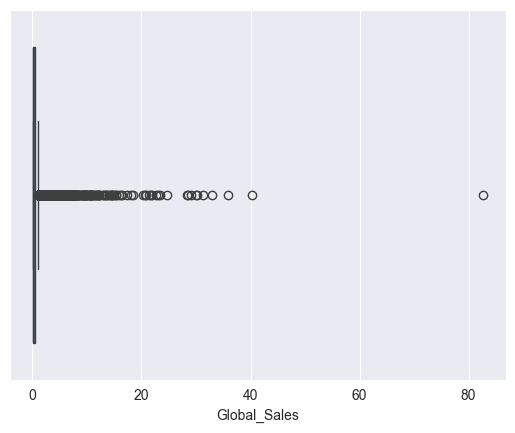

In [78]:
sns.boxplot(x=vgssales['Global_Sales'])
plt.show()

#This allows us to spot any outliers in the global sales column

---

## Exploratory Data Analysis

We now start to create visualisations of the data and insights we want to gain from the data using our python packages.

In [34]:
top_selling_games = vgssales[["Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(10)
top_selling_games


,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


### Top Best Selling Video Games of all time 

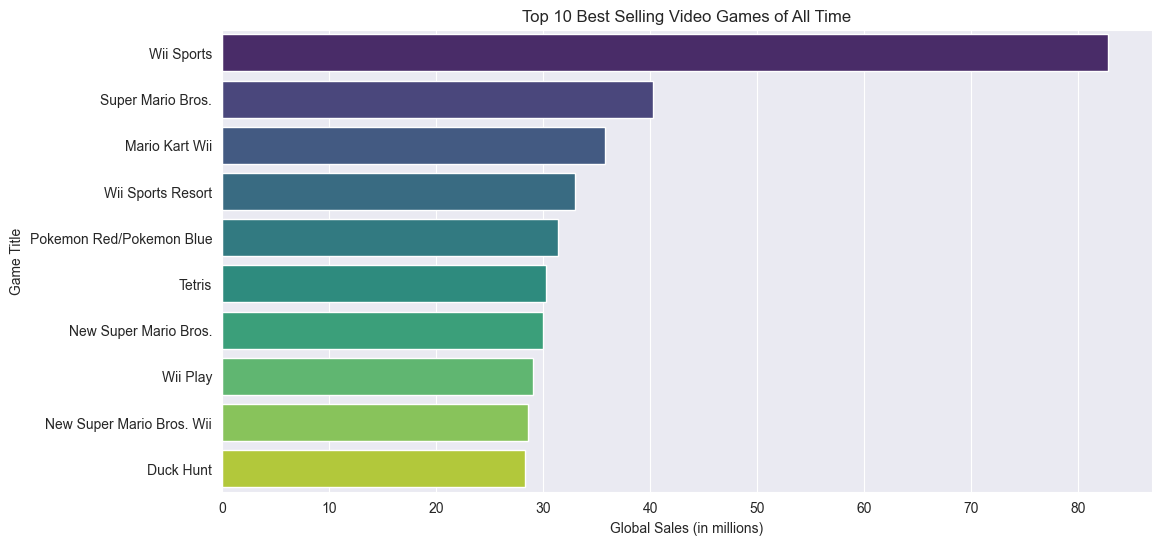

In [42]:
sns.set_style("darkgrid")
top_selling_games = vgssales.nlargest(10, "Global_Sales")

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Global_Sales",
    y="Name",
    data=top_selling_games,
    hue="Name",  
    palette="viridis",
    legend=False
)

plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Title")
plt.title("Top 10 Best Selling Video Games of All Time")


plt.show()

Here we are displaying, in the form of a horizontal bar chart, the top 10 best selling video games of all time globally. We can see that Wii Sports leads with 80+ million sales whereas Duck Hunt is places last at 26+ million sales. Nintendo as a publisher/console appears the most frequently.

---

### Global Sales

In [36]:
platform_s = vgssales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
platform_s


Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
PS       727.39
GBA      313.56
PSP      291.71
PS4      278.10
PC       255.05
GB       254.42
XB       252.09
NES      251.07
3DS      246.28
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.63
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

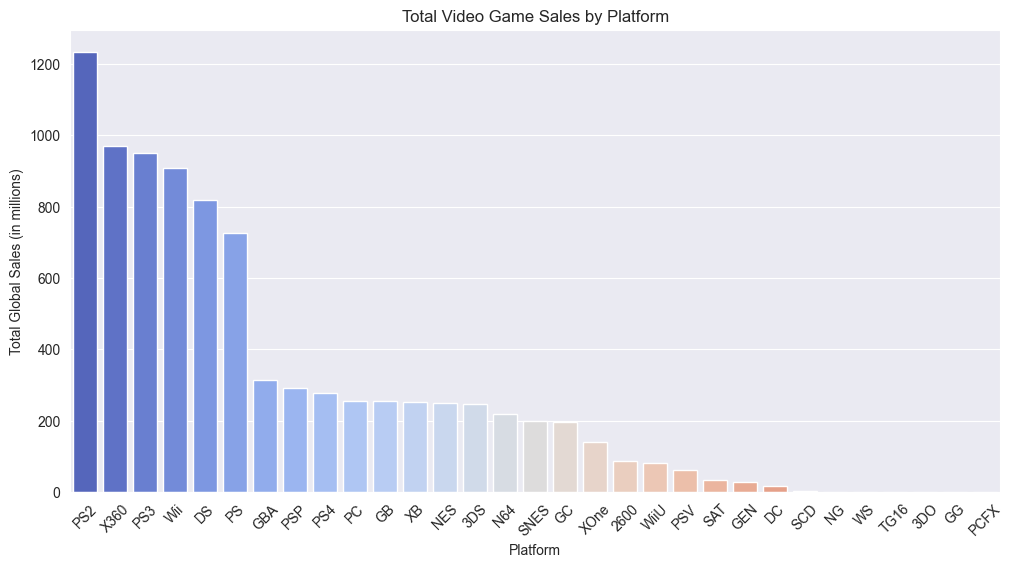

In [83]:
#Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=platform_s.index,
    y=platform_s.values,
    hue=platform_s.index,  
    palette="coolwarm",
    legend=False  
)
#PLabels and titles
#.xticks just rotates the words on the x axis
plt.xlabel("Platform")
plt.ylabel("Total Global Sales (in millions)")
plt.title("Total Video Game Sales by Platform")
plt.xticks(rotation=45)

plt.show()


Using a bar chart we can see the total video game sales by platform. The four concoles at the bottom may not have accurate or consistent data. We can see the PS2 leads wwith 1200+ millions with the X360 and PS3 in second and third which accurately describes the sales for the time period this data was created in as well as the fact it focuses on hardware sales.
- Sony's PS2 leads along with microsofts Xbox and nintendos DS
- 7 Consoles do not have any sales (Possible dropped data)

---

### Video Game Sales Over Time

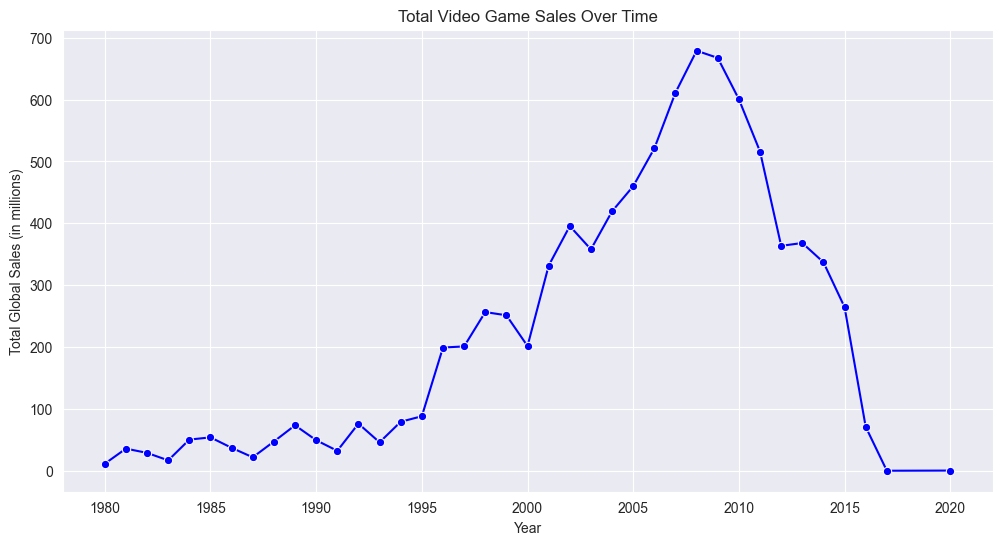

In [84]:
yearlyg_s = vgssales.groupby("Year")["Global_Sales"].sum()

#Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=yearlyg_s.index,
    y=yearlyg_s.values,
    marker="o",
    color="blue"
)

#Title
plt.xlabel("Year")
plt.ylabel("Total Global Sales (in millions)")
plt.title("Total Video Game Sales Over Time")

#Show plot
plt.show()

Total video game sales over time uses a line chart in order to effectively visualize how the sales changes over time. As we can see with time the number of video game sales increase which is consistent with videogames prices dropping over time and becoming more publically accesible and available over time. However, we see a drop around the 2008 to 2010 time. This is likely due to the data only being hardware sales when during this time period the digital acquisition of gaming was starting to gain traction for a lot of consoles and was the norm for pc sales.

---

### Video Game Sales by Genre

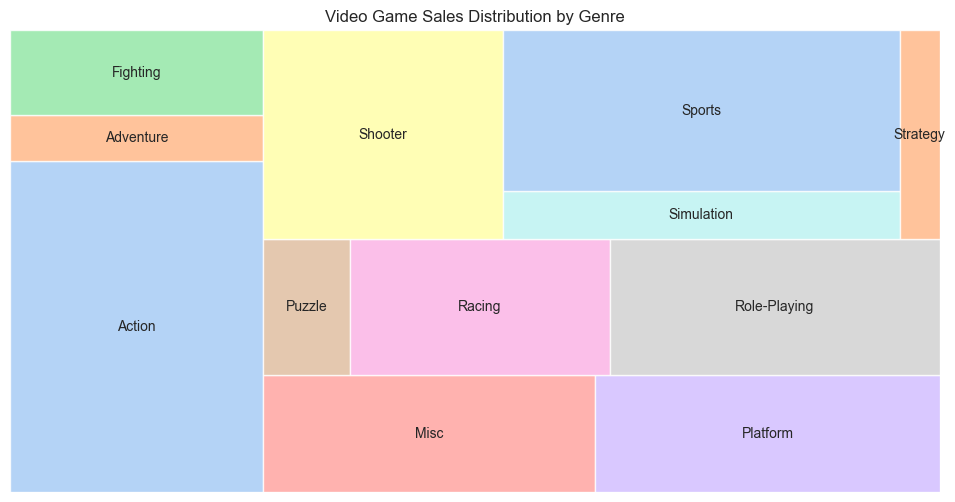

In [85]:
import squarify

#Treemap for Sales Distribution by Genre
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=genred_s.values, 
    label=genred_s.index, 
    alpha=0.8, 
    color=sns.color_palette("pastel")
)

# Title
plt.title("Video Game Sales Distribution by Genre")
plt.axis("off")  # Hide axes

# Show plot
plt.show()

#Squarify is the package we download then import in order to create the treemap


Using nested rectangles in this Treemap we can see wich video game genres are the most popular using sales distribution. 
- We can see puzzle, adventure and strategy seem the least popular.
- Whereas action sports and shooters seem the most popular.

---

### Regional Video Game Sales Over Time

<Figure size 1200x600 with 0 Axes>

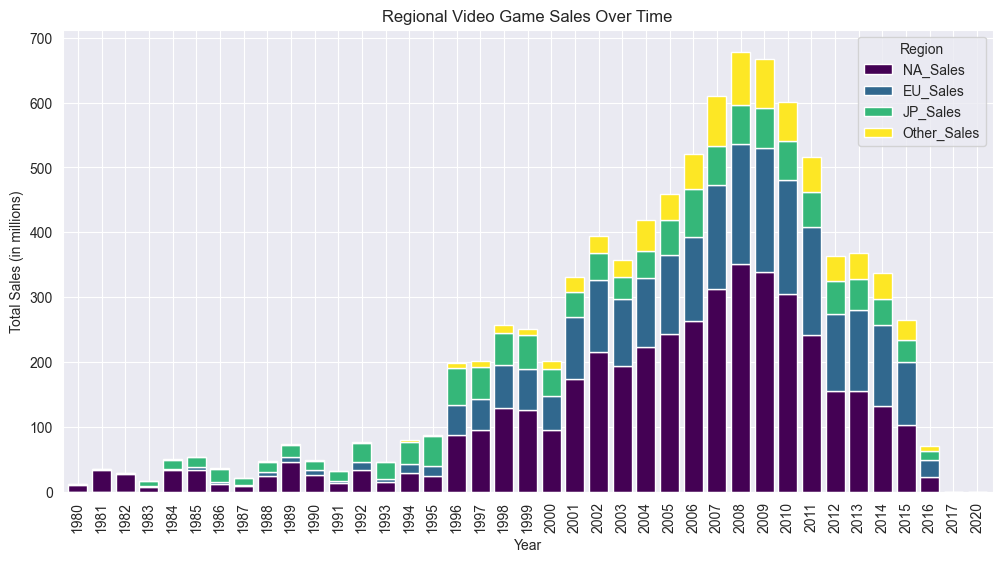

In [86]:
#Regional Sales Comparison
region_s = vgssales.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

#Plot
plt.figure(figsize=(12, 6))
region_s.plot(kind="bar", stacked=True, colormap="viridis", width=0.8, figsize=(12, 6))

#Labels and title
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.title("Regional Video Game Sales Over Time")
plt.legend(title="Region")


plt.show()

The regional video game sales over time stacked bar chart presents insights on North America, Japan, Europe and other sales.
- North America has the the greatest number of sales
- Japan has very strong sales, some of which might not be seen because of the time period this captures data in

---

# Summary of Insights and Analysis

The analysis of the video game sales dataset has provided several key insights into the industry's dynamics, trends, and regional preferences. Below is an overview of these findings.

---

## **Top 10 Best-Selling Games**

- **Dominance of Iconic Franchises:** The top-selling games are exclusively from well established franchises, showing the significant impact of brand recognition and loyal fan bases on sales figures.

- **Notable Titles:** Games such as *Wii Sports*, *Super Mario Bros.*, and *Mario Kart Wii* feature prominently, highlighting Nintendo's strong market presence during the dataset's timeframe.

**Supporting Article:** [Video Game Sales Analysis: Insights Using Python](https://medium.com/@chukwujekwu006/video-game-sales-analysis-insights-using-python-5c5afc8c2fc4)

---

## **Total Sales by Platform**

- **Nintendo's Market Leadership:** Platforms like the Nintendo DS and Wii have achieved remarkable sales, reflecting Nintendo's effective market strategies and the widespread appeal of their gaming consoles.

- **Platform Specific Success:** The data indicates that certain games achieve exceptional sales on specific platforms, suggesting a strong alignment between game design and platform capabilities.

**Supporting Article:** [Video Game Sales - Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)

---

## **Sales Trends Over Time**

- **Growth in the Early 2000s:** There was a significant increase in video game sales during the early 2000s, coinciding with the release of innovative gaming consoles and the expansion of the gaming demographic and the end of arcades in Japan.

- **Recent Decline in Physical Sales:** The dataset shows a decline in physical game sales in recent years, a trend corroborated by industry reports indicating a shift towards digital downloads and subscription based models.

---

## **Video Game Sales Distribution by Genre**

- **Action and Sports Genres Lead:** Action and sports games dominate sales figures, reflecting consumer preferences for dynamic and competitive gaming experiences.

- **Emergence of New Genres:** While traditional genres maintain high sales, there is a noticeable rise in sales for genres like role-playing and simulation, indicating a diversifying market.

**Supporting Article:** [Video Game Industry - Statistics & Facts](https://www.statista.com/topics/868/video-games/)

---

## **Regional Sales Comparison**

- **North American Market Dominance:** North America accounts for the largest share of video game sales, highlighting its significance as a primary market for game developers and publishers.

- **Regional Preferences:** The data reveals distinct regional preferences, with certain genres and franchises performing exceptionally well in specific markets, underscoring the importance of localized marketing strategies.

**Supporting Article:** [The Gaming Industry: A Behemoth With Unprecedented Global Reach](https://www.forbes.com/councils/forbesagencycouncil/2023/11/17/the-gaming-industry-a-behemoth-with-unprecedented-global-reach/)

---

## **Conclusion**

The analysis provides valuable insights into the video game industry's sales dynamics, platform performances, genre popularity, and regional preferences. The supporting articles data was not used in the actual dataset or to impact final decisions on the dataset but to act as a guide to support arguments and insights.It is also important to consider the context provided at the beginning when going through the notebook. This is the end of the notebook, thank you for reading.

---